<a href="https://colab.research.google.com/github/11335184/HOUSE/blob/main/21002report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 完成以下步驟，即可做出散佈圖

### 之後地科還會用到，記不起來沒關係，可以參照textbook.ipynb的過程

## step 1 匯入函式庫

In [25]:
import numpy as np

## step 2 宣告兩個numpy陣列的變數，分別為x數據與y數據

### <font color=#ff00ff> 注意 : y數據的shape應為(8,6) </font>

In [26]:
x = np.array([49.5,49,48.5,48,47.5,-49.5,-49,-48.5,-48,-47.5])        # shape = (10,)
y = np.array([
    [17.5,14.5,15,14,14,16,12.5,14],
    [24,22.5,23.3,23,24,22,22,22],
    [30.5,32.5,31.5,31,34,27.5,26,25],
    [32,34,35,34.5,35,33.5,33.5,32],
    [36,36,35,36,37,39,37,38],
    [25.5,28.5,24,26.5,27,27.5,27,27],
    [33.5,32.5,32,33,31,32,30.5,30],
    [38,37.5,36,37.5,37,38,37,36],
    [56,56,59,57,58,56.5,55,58],
    [64,66,66.5,64,65.2,66,65,64.5]
])  # shape = (10, 8)
print("x.shape =", x.shape)  # (10,)
print("y.shape =", y.shape)  # (10,8)

x.shape = (10,)
y.shape = (10, 8)


## step 3 宣告兩個變數，分別為y數據的平均與標準差

In [27]:
# Step 3: 計算 y 數據的平均與標準差
y_mean = np.mean(y)
y_std = np.std(y)

## step 4 繪製散佈圖與誤差棒 (Error Bar)

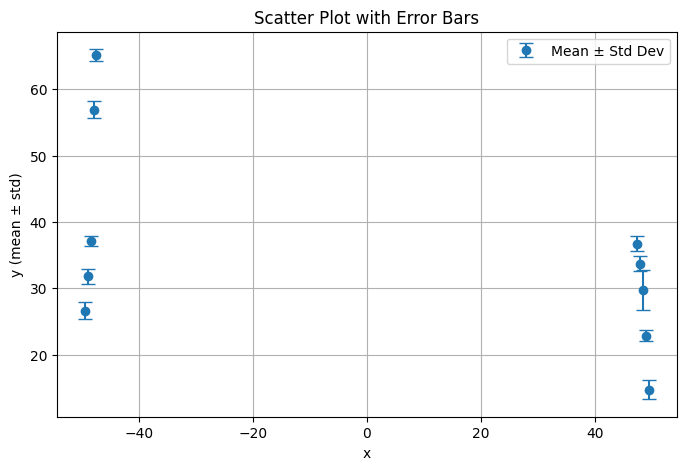

In [28]:
import matplotlib.pyplot as plt

# Step 4: 計算每一列的平均與標準差（對應每個 x 值）
row_mean = np.mean(y, axis=1)
row_std = np.std(y, axis=1)

# 繪製散佈圖與誤差棒
plt.figure(figsize=(8, 5))
plt.errorbar(x, row_mean, yerr=row_std, fmt='o', capsize=5, label='Mean ± Std Dev')

plt.title("Scatter Plot with Error Bars")
plt.xlabel("x")
plt.ylabel("y (mean ± std)")
plt.grid(True)
plt.legend()
plt.show()

## step 5 觀察散佈圖比較像哪一個方程式，並用註解的方式輸入在下面空格中

1. 多項式( y = ax**2 + bx + c )
2. 指數(y = e**x + c)
3. 對數(y = ln(x) + c)
4. 數學課學過的方程式

In [29]:
# 根據散佈圖的形狀，這些數據似乎更符合二次方程式 (y = ax^2 + bx + c)，
# 這是因為數據顯示出對稱的波動，這是二次曲線的典型特徵。


## step 6 根據你們決定的方程式，改寫以下矩陣中的G、d 於下一格中

### 如果你們的方程式是 $ y = m_0+m_1 x $

### 則 m、G、d 為

$$ \mathbf G  = \begin{bmatrix} 1 & x_1 \\ 1 & x_2  \\ \vdots  & \vdots \\ 1 & x_n  \end{bmatrix},
\mathbf m= \begin{bmatrix} m_0\\ m_1 \end{bmatrix}, \mathbf d  = \begin{bmatrix} y_1\\ y_2 \\ \vdots \\ y_n  \end{bmatrix}$$

### 請依照上述規矩改寫

In [30]:
# Step 6: 建立 G、d
G = np.column_stack((np.ones_like(x), x))  # G = [1, x]
d = row_mean  # y 平均值向量

# 用最小平方法解 m
# m = (G^T G)^-1 G^T d
m = np.linalg.inv(G.T @ G) @ G.T @ d

# 輸出結果
print("設計矩陣 G:")
print(G)
print("\n資料向量 d:")
print(d)
print("\n求得的參數 m:")
print(m)
print(f"\nm0 = {m[0]:.2f}, m1 = {m[1]:.2f}")

設計矩陣 G:
[[  1.   49.5]
 [  1.   49. ]
 [  1.   48.5]
 [  1.   48. ]
 [  1.   47.5]
 [  1.  -49.5]
 [  1.  -49. ]
 [  1.  -48.5]
 [  1.  -48. ]
 [  1.  -47.5]]

資料向量 d:
[14.6875 22.85   29.75   33.6875 36.75   26.625  31.8125 37.125  56.9375
 65.15  ]

求得的參數 m:
[35.5375     -0.16375545]

m0 = 35.54, m1 = -0.16


## step 7 算出矩陣 m

### 提示 $ \mathbf m = [\mathbf G^{\mathbf T}\mathbf G]^{-1}\mathbf G^{\mathbf T}\mathbf d  $

In [34]:
# Step 7: 根據 m = (G^T G)^(-1) G^T d 計算參數 m

import numpy as np

# 假設你已經有 G 和 d
# 例如從前面步驟拿到的 G 和 d：
# G 是設計矩陣，d 是 y 的平均值（row_mean）

# 這邊為了示範，我直接寫出 G 和 d，請用你自己的值替換
x = np.array([49.5,49,48.5,48,47.5,-49.5,-49,-48.5,-48,-47.5])
row_mean = np.array([14.6875,22.85,29.75,33.6875,36.75,26.625,31.8125,37.125,56.9375,65.15])

G = np.column_stack((np.ones_like(x), x))  # 建立 G
d = row_mean  # 建立 d

# 計算 m
GT = G.T
GTG = GT @ G
GTd = GT @ d
GTG_inv = np.linalg.inv(GTG)
m = GTG_inv @ GTd

print("計算出的參數 m：", m)
print(f"m0 = {m[0]:.4f}, m1 = {m[1]:.4f}")

計算出的參數 m： [35.5375     -0.16375545]
m0 = 35.5375, m1 = -0.1638


## step 8 算出經由最適直線預測出操縱變因理應測量到的值，並將其存為一個變數

In [35]:
# 假設已經有 m 與 x

# 預測值
y_pred = m[0] + m[1] * x

print("預測的 y 值：", y_pred)

預測的 y 值： [27.43160544 27.51348316 27.59536088 27.6772386  27.75911633 43.64339456
 43.56151684 43.47963912 43.3977614  43.31588367]


## step 9 算出相關係數 $ R^2 $ ，並存為一個變數

In [36]:
# y 實際值（平均值）
y_true = row_mean

# y 預測值 (Step 8)
y_pred = m[0] + m[1] * x

# 計算殘差平方和（RSS）
rss = np.sum((y_true - y_pred)**2)

# 計算總平方和（TSS）
tss = np.sum((y_true - np.mean(y_true))**2)

# 計算 R^2
R2 = 1 - rss / tss

print(f"R^2 = {R2:.4f}")

R^2 = 0.3056


## step 10 將回歸直線與相關係數呈現在新的散佈圖上，並儲存成png檔案

/tmp/ipython-input-1727351289.py:33: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.savefig('regression_plot.png', dpi=300)
/tmp/ipython-input-1727351289.py:33: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.savefig('regression_plot.png', dpi=300)
/tmp/ipython-input-1727351289.py:33: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.savefig('regression_plot.png', dpi=300)
/tmp/ipython-input-1727351289.py:33: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.savefig('regression_plot.png', dpi=300)
/tmp/ipython-input-1727351289.py:33: UserWarning: Glyph 27512 (\N{CJK UNIFIED IDEOGRAPH-6B78}) missing from font(s) DejaVu Sans.
  plt.savefig('regression_plot.png', dpi=300)
/tmp/ipython-input-1727351289.py:33: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sa

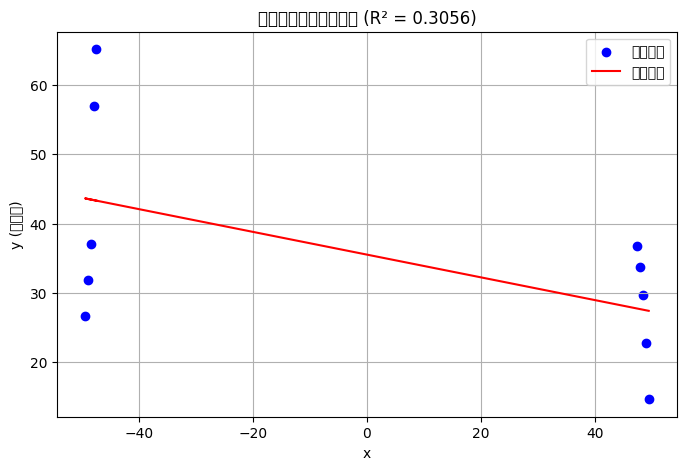

圖檔已儲存為 regression_plot.png


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 假設已有以下變數（前面步驟的結果）
x = np.array([49.5,49,48.5,48,47.5,-49.5,-49,-48.5,-48,-47.5])
row_mean = np.array([14.6875,22.85,29.75,33.6875,36.75,26.625,31.8125,37.125,56.9375,65.15])

G = np.column_stack((np.ones_like(x), x))
d = row_mean

# 計算回歸參數
m = np.linalg.inv(G.T @ G) @ G.T @ d

# 計算預測值
y_pred = m[0] + m[1] * x

# 計算 R^2
rss = np.sum((row_mean - y_pred)**2)
tss = np.sum((row_mean - np.mean(row_mean))**2)
R2 = 1 - rss / tss

# 繪圖
plt.figure(figsize=(8,5))
plt.scatter(x, row_mean, color='blue', label='觀測資料')
plt.plot(x, y_pred, color='red', label='回歸直線')
plt.title(f"回歸直線與資料散佈圖 (R² = {R2:.4f})")
plt.xlabel('x')
plt.ylabel('y (平均值)')
plt.legend()
plt.grid(True)

# 儲存成 PNG 檔案
plt.savefig('regression_plot.png', dpi=300)
plt.show()

print("圖檔已儲存為 regression_plot.png")


## step final 上面散佈圖中的最適直線代表什麼意思，請以註解的方式輸入在下一格

In [16]:
# 此圖中的紅色直線是基於最小平方誤差法擬合出的線性回歸模型，表示 x 和 y 之間的線性關係。
# 然而，R² 值為 0.3056，顯示出這條線性擬合的解釋能力較低，數據的變化無法很好地用直線來描述。
# 這表示數據可能呈現非線性關係或需要更複雜的模型來解釋。